##Building a Neural Network from scratch

Since we know the mathematical theory behind the working of a Neural Network, our goal is now to try and implement it (one can only learn by actually applying the learnt concepts).

We first begin with the necessary imports.

In [ ]:
import numpy as np #will be useful for constructing arrays
from keras.datasets import mnist #the dataset we are trying to make our network learn
import matplotlib.pyplot as plt #for plotting
import math as m

##Importing the dataset

It is always good practice to know the dataset inside out while building the network. It helps in deciding hyperparameters for the network (like how many neurons is optimal per layer and how many layers there need to be).

For this we plot the images and use print commands to understand the shape and structure of all the arrays we are working with.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #importing the mnist dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


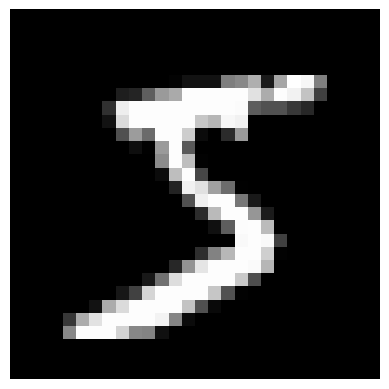

5


In [ ]:
plt.imshow(x_train[0].squeeze(), cmap = 'gray')
plt.axis('off')
plt.show()
print(y_train[0])

##Building the Neural Network

Let us start defining the structure of the model. We also define functions for us to apply sigmoidal and softmax activations at each layer.

In [ ]:
#dimensions of the network: the inputs are 784 pixels corresponding to the image of the handwritten digit
num_rows = 28
num_inputs = 28*28

#three hidden layers with 64, 40 and 16 neurons each
num_h1 = 64
num_h2 = 40
num_h3 = 16

#10 outputs corresponding to one digit each
num_outputs = 10


#initialize weights and biases as random values
w_in1 = np.random.randn(num_h1, num_inputs)
w_12 = np.random.randn(num_h2, num_h1)
w_23 = np.random.randn(num_h3, num_h2)
w_3ou = np.random.randn(num_outputs, num_h3)
b_1 = np.random.randn(num_h1,)
b_2 = np.random.randn(num_h2,)
b_3 = np.random.randn(num_h3,)
b_out = np.random.randn(num_outputs,)

#defining activation functions used in this network along with their derivatives
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def softmax(x):
  return np.divide(np.exp(x), np.sum(np.exp(x)))

def sigmoid_derivative(x):
  return sigmoid(x)*(1 - sigmoid(x))

def softmax_derivative(x):
  return softmax(x)*(1 - softmax(x))



##Training the Neural Network

We start training the network by applying forward passes and calculating the cost (we have chosen mean square error loss here). Then we apply gradient descent (partial derivatives are calculated from scratch using the chain rule) and find the optimal values of weights and biases.

In [ ]:
l = 0.01 #learning rate of the network

num_grad_desc_steps = 10 #number of times we are going to perform a forward and a backward pass

while True:

  cost = 0 #cost is zero because it needs to be calculated for every forward pass independently
  batch_size = 3 #number of images that we are training the network over

  #converting the 28x28 image into a single input vector of size 784
  for a in range(batch_size):
    inp = []
    for i in range(num_rows):
      for j in range(num_rows):
        inp.append(x_train[a][i][j]/255)

    #forward pass
    h_1 = np.matmul(w_in1, inp) + b_1
    h_1 = sigmoid(h_1) #applying a sigmoidal activation

    h_2 = np.matmul(w_12, h_1) + b_2
    h_2 = sigmoid(h_2)

    h_3 = np.matmul(w_23, h_2) + b_3
    h_3 = sigmoid(h_3)

    out = np.matmul(w_3ou, h_3) + b_out
    out = softmax(out) #applying a softmax activation

    #calculation of the cost
    for k in range(num_outputs):
      if k == y_train[a]:
        cost += 0.5*m.pow(out[k] - 1, 2)
      else:
        cost += 0.5*m.pow(out[k], 2)

    #Back Propogation

    #calculation of the derivatives of the cost function with respect to parameters that directly affect it
    dC_dw_3ou = np.zeros((10, 16))
    dC_db_out = np.zeros((10,))
    dC_dh_3 = np.zeros((16,))
    for i in range(10):
      for j in range(16):
        if i == y_train[a]:
          dC_dw_3ou[i][j] += (out[i] - 1)*h_3[j]*out[i]*(1 - out[i])
          dC_db_out[i] += (out[i] - 1)*out[i]*(1 - out[i])
          dC_dh_3[j] += (out[i] - 1)*w_3ou[i][j]*out[i]*(1 - out[i])
        else:
          dC_dw_3ou[i][j] += out[i]*h_3[j]*out[i]*(1 - out[i])
          dC_db_out[i] += out[i]*out[i]*(1 - out[i])
          dC_dh_3[j] += out[i]*w_3ou[i][j]*out[i]*(1 - out[i])


    #calculation of the effect of the weights and biases on the third hidden layer
    dh_3_dw_23 = np.zeros((16, 40))
    dh_3_db_3 = np.zeros((16,))
    dh_3_dh_2 = np.zeros((16, 40))
    for i in range(16):
      for j in range(40):
        dh_3_dw_23[i][j] += h_2[j]*h_3[i]*(1 - h_3[i])
        dh_3_db_3[i] += 1*h_3[i]*(1 - h_3[i])
        dh_3_dh_2[i][j] += w_23[i][j]*h_3[i]*(1 - h_3[i])


    #calculation of the effect of the weights and biases on the second hidden layer
    dh_2_dw_12 = np.zeros((40, 64))
    dh_2_db_2 = np.zeros((40,))
    dh_2_dh_1 = np.zeros((40, 64))
    for i in range(40):
      for j in range(64):
        dh_2_dw_12[i][j] += h_1[j]*h_2[i]*(1 - h_2[i])
        dh_2_db_2[i] += 1*h_2[i]*(1 - h_2[i])
        dh_2_dh_1[i][j] += w_12[i][j]*h_2[i]*(1 - h_2[i])


    #calculation of the effect of the weights and biases on the first hidden layer
    dh_1_dw_in1 = np.zeros((64, 784))
    dh_1_db_1 = np.zeros((64,))
    dh_1_dinp = np.zeros((64, 784))
    for i in range(64):
      for j in range(784):
        dh_1_dw_in1[i][j] += inp[j]*h_1[i]*(1 - h_1[i])
        dh_1_db_1[i] += 1*h_1[i]*(1 - h_1[i])
        dh_1_dinp[i][j] += w_in1[i][j]*h_1[i]*(1 - h_1[i])

  #dividing through by number of training examples to find the average cost per image
  dC_dw_3ou = np.divide(dC_dw_3ou, batch_size)
  dC_db_out = np.divide(dC_db_out, batch_size)
  dC_dh_3 = np.divide(dC_dh_3, batch_size)
  dh_3_dw_23 = np.divide(dh_3_dw_23, batch_size)
  dh_3_db_3 = np.divide(dh_3_db_3, batch_size)
  dh_3_dh_2 = np.divide(dh_3_dh_2, batch_size)
  dh_2_dw_12 = np.divide(dh_2_dw_12, batch_size)
  dh_2_db_2 = np.divide(dh_2_db_2, batch_size)
  dh_2_dh_1 = np.divide(dh_2_dh_1, batch_size)
  dh_1_dw_in1 = np.divide(dh_1_dw_in1, batch_size)
  dh_1_db_1 = np.divide(dh_1_db_1, batch_size)
  dh_1_dinp = np.divide(dh_1_dinp, batch_size)

  #calculating the indirect effect of the first and second hidden layers on the overall cost
  dC_dh_1 = dC_dh_3@dh_3_dh_2@dh_2_dh_1
  dC_dh_2 = dC_dh_3@dh_3_dh_2

  #Updating each of the parameters of the network using gradient descent

  #updating weights
  w_in1 = w_in1 - l*(dC_dh_1@dh_1_dw_in1)
  w_12 = w_12 - l*(dC_dh_2@dh_2_dw_12)
  w_23 = w_23 - l*(dC_dh_3@dh_3_dw_23)
  w_3ou = w_3ou - l*dC_dw_3ou

  #updating biases
  b_1 = b_1 - l*(dC_dh_1@dh_1_db_1)
  b_2 = b_2 - l*(dC_dh_2@dh_2_db_2)
  b_3 = b_3 - l*(dC_dh_3@dh_3_db_3)
  b_out = b_out - l*dC_db_out

  #finding the average cost over the entire batch
  cost = cost/batch_size


  print("Cost at the", 10 - num_grad_desc_steps, "th iteration is:", cost)


  num_grad_desc_steps -= 1
  if num_grad_desc_steps == 0: #terminating condition for the while loop
    break


Cost at the 0 th iteration is: 0.4609292524777017
Cost at the 1 th iteration is: 0.4603712018824933
Cost at the 2 th iteration is: 0.4598193362392487
Cost at the 3 th iteration is: 0.4592738546790284
Cost at the 4 th iteration is: 0.4587349581963784
Cost at the 5 th iteration is: 0.45820284934378924
Cost at the 6 th iteration is: 0.45767773191506295
Cost at the 7 th iteration is: 0.4571598106181884
Cost at the 8 th iteration is: 0.45664929073839083
Cost at the 9 th iteration is: 0.4561463777921036


##Testing the model

Remember we parsed the given MNIST dataset into train and test datasets? We're going to put that test dataset to use now. With our trained weights and biases we expect our network to now behave intelligently and predict the handwritten digits with a good accuracy.

We now only feed the data forward, calculate the activations of the neurons at each of the outputs and simply choose the neuron with the maximum activation as the predicted value. If this matches with the given true value, we increase a "counter" and finally calculate the accuracy.

In [ ]:
count = 0 #counts the number of times the network predicts the value correctly
num_imgs = 10000
for a in range(num_imgs): #there are 10,000 images in the test dataset

  inp = [] #entering the input pixel values
  for i in range(num_rows):
    for j in range(num_rows):
      inp.append(x_test[a][i][j]/255) #normalised pixel values between 0 and 1

  #forward pass
  h_1 = np.matmul(w_in1, inp) + b_1
  h_1 = sigmoid(h_1)

  h_2 = np.matmul(w_12, h_1) + b_2
  h_2 = sigmoid(h_2)

  h_3 = np.matmul(w_23, h_2) + b_3
  h_3 = sigmoid(h_3)

  out = np.matmul(w_3ou, h_3) + b_out
  out = softmax(out)

  if out.tolist().index(out.max()) == y_test[a]: #checking if the predicted value matches the true value
    count += 1

print("Accuracy of the neural network is:", count/num_imgs * 100, "%")



0.1006
